In [1]:
import pandas as pd
import numpy as np
import dill as pickle
from datetime import datetime, timedelta

from cosinorage.datahandlers import GalaxyDataHandler, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures, plot_cosinor, plot_sleep_predictions, plot_non_wear

%load_ext autoreload
%autoreload 2

In [2]:
reload_galaxy = True

In [3]:
preprocess_args = {
    'rescale_factor': 0.0005,
    'autocalib_sd_criter': 0.01,
    'autocalib_sphere_crit': 0.02,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.00067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
}

In [4]:
if reload_galaxy:
    galaxy_loader = GalaxyDataHandler(gw_file_dir='../data/smartwatch/GalaxyWatch_Case1/', preprocess=True, preprocess_args=preprocess_args, verbose=True)
    with open("pickle/galaxy_loader.pkl", "wb") as file:
        pickle.dump(galaxy_loader, file)
else:
    with open("pickle/galaxy_loader.pkl", "rb") as file:
        galaxy_loader = pickle.load(file)

Read 142 files from ../data/smartwatch/GalaxyWatch_Case1/
Loaded 12537000 accelerometer data records from ../data/smartwatch/GalaxyWatch_Case1/
Filtered out 1894214/10642786 accelerometer records due to filtering out first and last day
Filtered out 0/10642786 accelerometer records due to incomplete daily coverage
Filtered out 0/10642786 minute-level accelerometer records due to filtering for longest consecutive sequence of days
Resampled 10642786 to 10800000 timestamps
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Preprocessed accelerometer data
Calculated ENMO for 10800000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
__load_data executed in 47.53 seconds


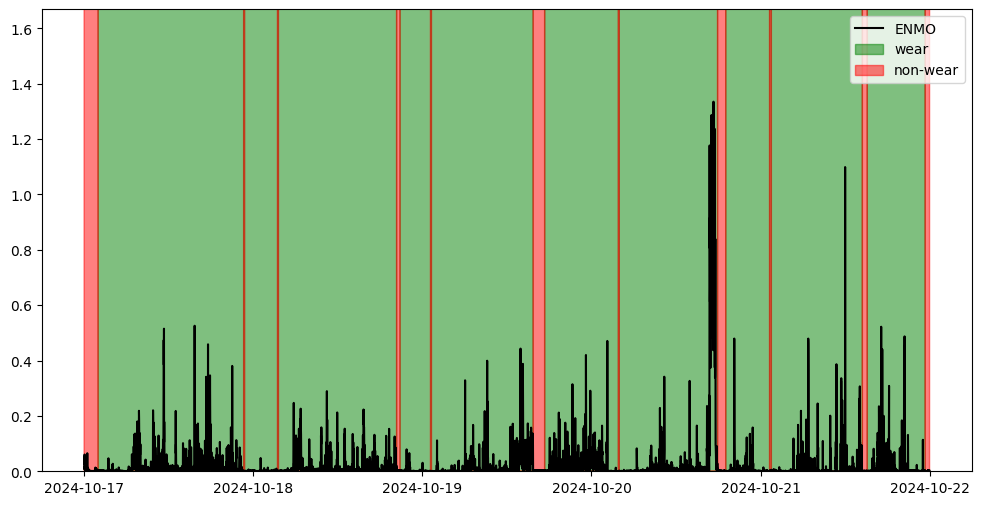

In [5]:
plot_enmo(galaxy_loader)

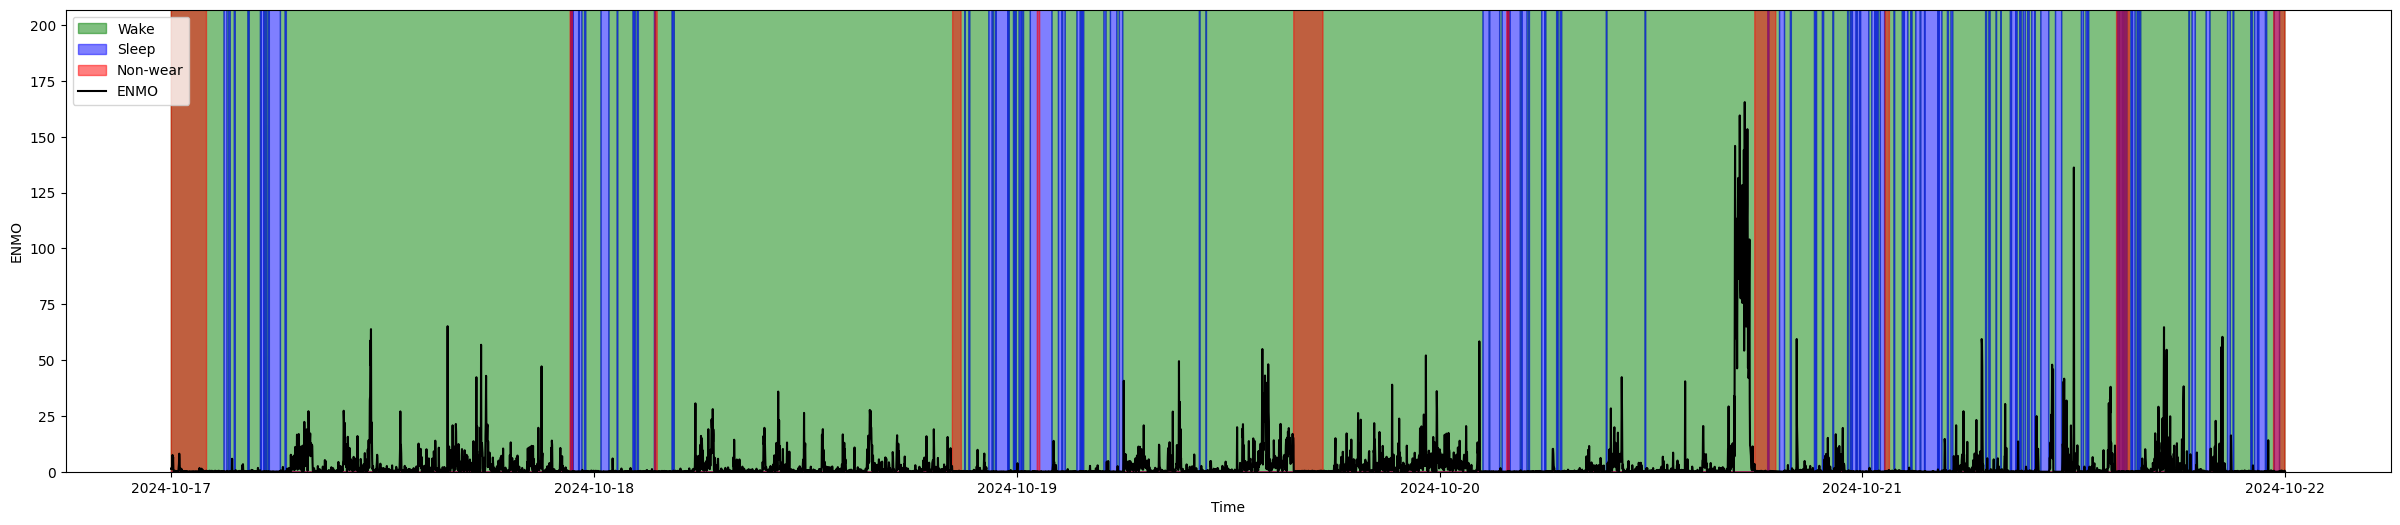

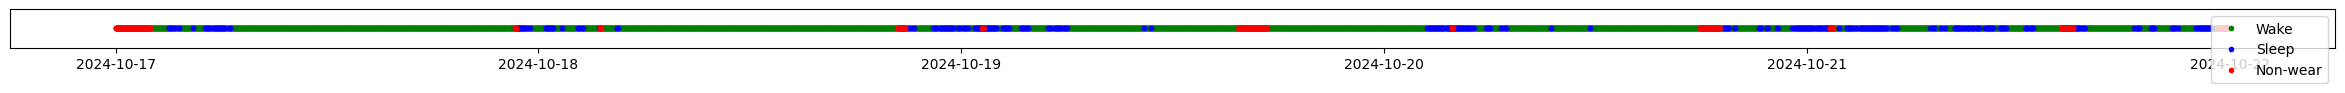

In [6]:
features = WearableFeatures(galaxy_loader, upper_quantile=0.997)
features.run()
plot_sleep_predictions(features, simple=False)
plot_sleep_predictions(features, simple=True)

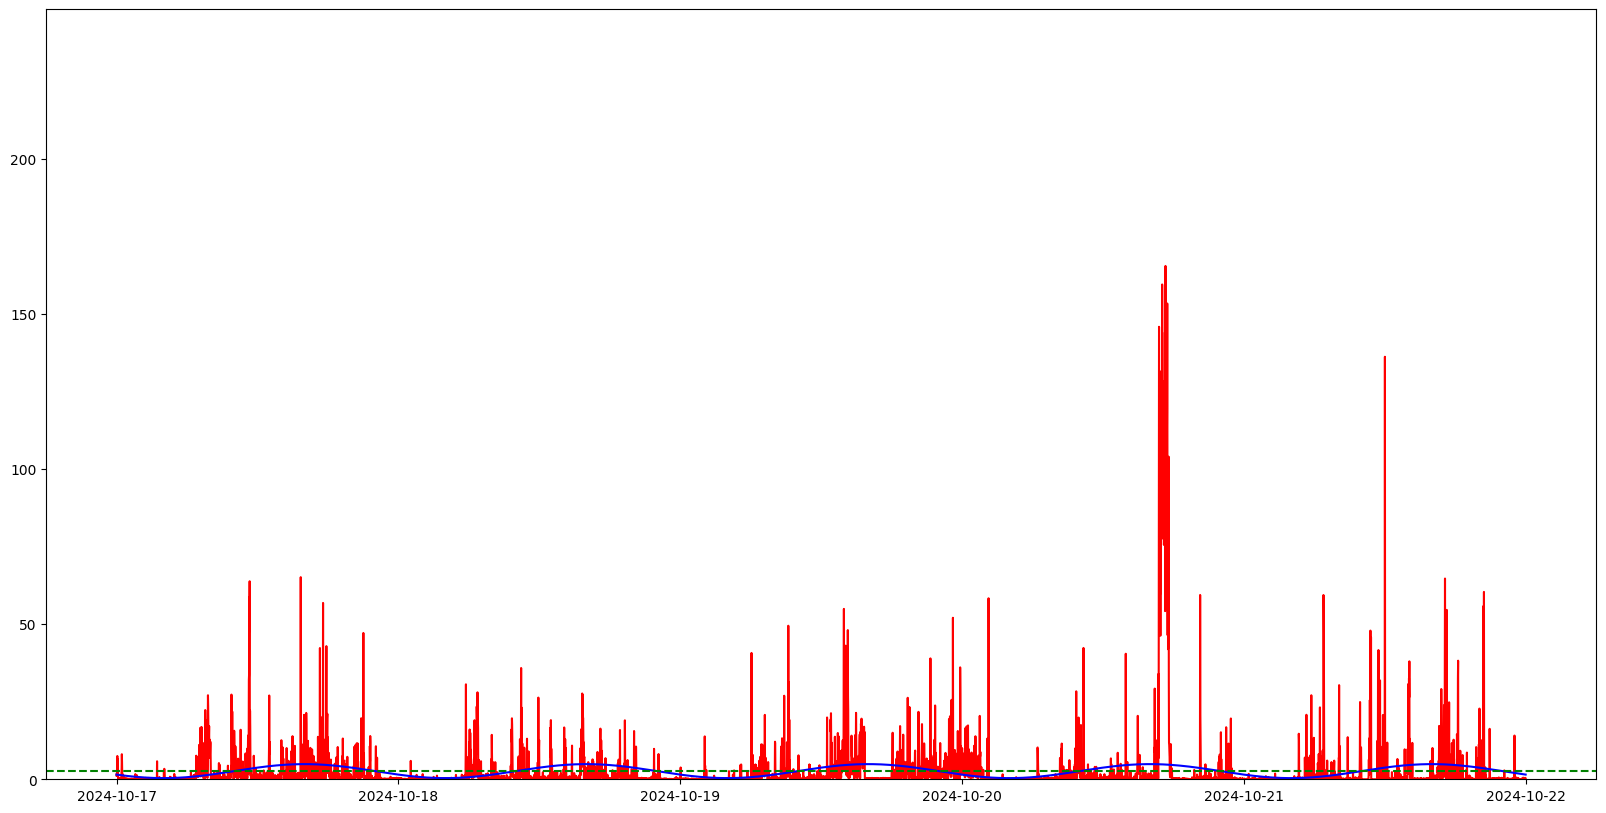

In [7]:
plot_cosinor(features, multiday=True)

In [8]:
features.get_cosinor_features()[1]

{'MESOR': 2.632107193793873,
 'amplitude': 2.2574694201723626,
 'acrophase': 4.19356632815691,
 'acrophase_time': 16.01824344743764}

In [9]:
features.get_all()

(               MESOR  amplitude  acrophase  acrophase_time        IV  \
 2024-10-17  2.250993   1.614237   3.677608       14.047427  0.970789   
 2024-10-18  1.442732   1.027575   3.164475       12.087402  0.865009   
 2024-10-19  2.520469   1.416290   4.279446       16.346281  1.035007   
 2024-10-20  4.933929   7.013055   4.532215       17.311784  0.220982   
 2024-10-21  2.012413   1.536984   3.665499       14.001175  1.209213   
 
                   IS        RA        M10  M10_start        L5  L5_start  \
 2024-10-17  0.774104  0.908903   4.335129          7  0.206882         5   
 2024-10-18  1.891372  0.874921   2.657026          6  0.177254        23   
 2024-10-19  0.753537  0.922655   4.756080         14  0.191328         1   
 2024-10-20  0.079301  0.975246  11.058379         17  0.138586         3   
 2024-10-21  0.453748  0.930943   4.062822         17  0.145300         3   
 
                   SB      LIPA       MVPA   TST   WASO       PTA        SRI  
 2024-10-17  0.01

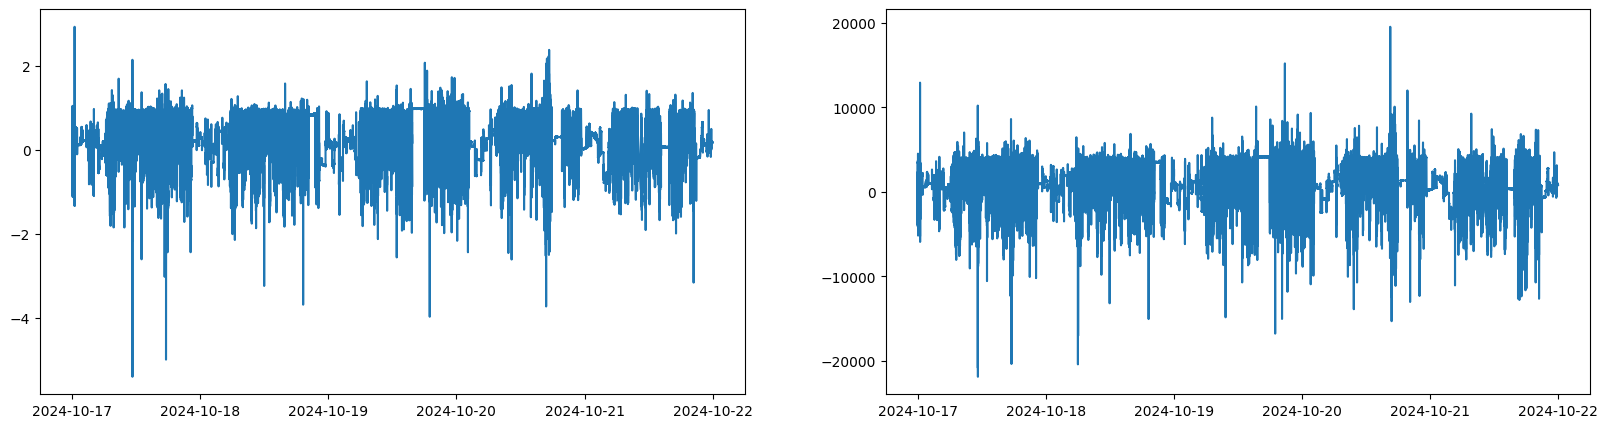

In [10]:
import matplotlib.pyplot as plt
# two plots next to each other
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(galaxy_loader.get_sf_data()['X'])
plt.subplot(1, 2, 2)
plt.plot(galaxy_loader.get_sf_data()['X_raw'])
plt.show()

In [11]:
galaxy_loader.get_meta_data()

{'datasource': 'samsung galaxy watch',
 'raw_n_timesteps': 12537000,
 'raw_n_days': 7,
 'raw_start_datetime': Timestamp('2024-10-16 21:58:17.509000'),
 'raw_end_datetime': Timestamp('2024-10-22 21:59:52.495000'),
 'raw_frequency': 'irregular (~25Hz)',
 'raw_datatype': 'accelerometer',
 'raw_unit': '',
 'resampled_n_timestamps': 10800000,
 'resampled_n_days': 5,
 'resampled_start_datetime': Timestamp('2024-10-17 00:00:00'),
 'resampled_end_datetime': Timestamp('2024-10-21 23:59:59.960000'),
 'resampled_frequency': '25Hz',
 'resampled_datatype': 'accelerometer',
 'resampled_unit': '',
 'calibration_offset': array([-0.03910105,  0.00957413, -0.00943375]),
 'calibration_scale': array([0.48589517, 0.48544801, 0.4830861 ]),
 'resampled_total_time': 431999.96,
 'resampled_wear_time': 405619.60000000003,
 'resampled_non-wear_time': 26380.359999999986}